In [1]:
### Load dependencies ###
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import os
import re
import pysam
import numpy as np
#%matplotlib inline

u'/Users/frickpl/gitHome/scriptsSU'

In [3]:
### Define file and genomic region ###

fileName = '150723-scTracks-PC9-erl'
myPath = '/raid/Tn5_chromatin/150723_scPC9_erl/'
os.chdir(myPath)
chrLoc = {'ch': 'chr19', 'start': 36192000 , 'end': 36242000}
groupNum = 50
groupSize = (chrLoc['end']-chrLoc['start'])/groupNum
groups = range(chrLoc['start'],chrLoc['end'],groupSize)

OSError: [Errno 2] No such file or directory: '/raid/Tn5_chromatin/150723_scPC9_erl/'

In [282]:
### Get the single-cell subdirectories within the path ###
#
#################   MUST FIND COMMON text to single-cell subdirectories (e.g., 'PC9' or 'PLF') and modify the 're.search' term ############################
scSub = [i for i in os.listdir(myPath) if os.path.isdir(i)]
scSub = filter(lambda x:re.search(r'PLF', x), scSub) #Only keep dirs that contain "PC9"
scLib = len(scSub)
print "single-cell directories found:"
print scSub

print "total libraries are: " + str(scLib)
print "testing code to get a  single-cell bam file"
scBam = [i for i in os.listdir(scSub[0]) if "flt.bam" in i and "bai" not in i]
scBam = ''.join(scBam)
print "single-cell bam is ... " + scBam

single-cell directories found:
['PLF-sc2', 'PLF-sc29', 'PLF-sc74', 'PLF-sc24', 'PLF-sc78', 'PLF-sc68', 'PLF-sc96', 'PLF-sc79', 'PLF-sc60', 'PLF-sc83', 'PLF-sc18', 'PLF-sc4', 'PLF-sc17', 'PLF-sc87', 'PLF-sc70', 'PLF-sc26', 'PLF-sc73', 'PLF-sc38', 'PLF-sc3', 'PLF-sc88', 'PLF-sc86', 'PLF-sc94', 'PLF-sc46', 'PLF-sc72', 'PLF-sc91', 'PLF-sc9', 'PLF-sc67', 'PLF-sc90', 'PLF-sc35', 'PLF-sc52', 'PLF-sc54', 'PLF-sc84', 'PLF-sc81', 'PLF-sc71', 'PLF-sc47', 'PLF-sc51', 'PLF-sc1', 'PLF-sc61', 'PLF-sc6', 'PLF-sc64', 'PLF-sc13', 'PLF-sc42', 'PLF-sc50', 'PLF-sc39', 'PLF-sc30', 'PLF-sc7', 'PLF-sc93', 'PLF-sc28', 'PLF-sc41', 'PLF-sc22', 'PLF-sc23', 'PLF-sc57', 'PLF-sc14', 'PLF-sc12', 'PLF-sc16', 'PLF-sc62', 'PLF-sc56', 'PLF-sc44', 'PLF-sc53', 'PLF-sc92', 'PLF-sc5', 'PLF-sc58', 'PLF-sc25', 'PLF-sc59', 'PLF-sc85', 'PLF-sc40', 'PLF-sc33', 'PLF-sc32', 'PLF-sc49', 'PLF-sc66', 'PLF-sc69', 'PLF-sc8', 'PLF-sc77', 'PLF-sc43', 'PLF-sc65', 'PLF-sc37', 'PLF-sc10', 'PLF-sc95', 'PLF-sc19', 'PLF-sc76', 'PLF-sc20', 'PLF-

In [283]:
# Use pysam to loop through each scLibrary and count the number of reads falling into each region of interest

df = pd.DataFrame()

for j in scSub:
    scPath = j    
    scBam = [i for i in os.listdir(scPath) if "flt.bam" in i and "bai" not in i]
    scBam = ''.join(scBam)
    scFile = scPath + "/" + scBam
    samfile = pysam.AlignmentFile(scFile, "rb")
    scReads = []
    for i in groups:
        readCount=0
        for reads in samfile.fetch('chr19',i,i + groupSize):
            readCount = readCount + 1
            scReads.append(readCount)                         
    df[scPath]=pd.Series(scReads)

print "The data frame is..."
print df.head()

The data frame is...
   PLF-sc2  PLF-sc29  PLF-sc74  PLF-sc24  PLF-sc78  PLF-sc68  PLF-sc96  \
0        0         0         0         0         0         0         0   
1        0         0         0         0         0         0         0   
2        0         0         0         0         0         0         0   
3        0         0         0         0         0         0         0   
4        0         0         0         0         0         0         0   

   PLF-sc79  PLF-sc60  PLF-sc83    ...     PLF-sc80  PLF-sc89  PLF-sc75  \
0         0         0         0    ...            0         0         0   
1         0         2         0    ...            2         0         0   
2         0         0         0    ...            0         0         0   
3         0         0         0    ...            0         0         0   
4         0         0         0    ...            0         0         0   

   PLF-sc15  PLF-sc27  PLF-sc31  PLF-sc48  PLF-sc21  PLF-sc63  PLF-sc55  
0        

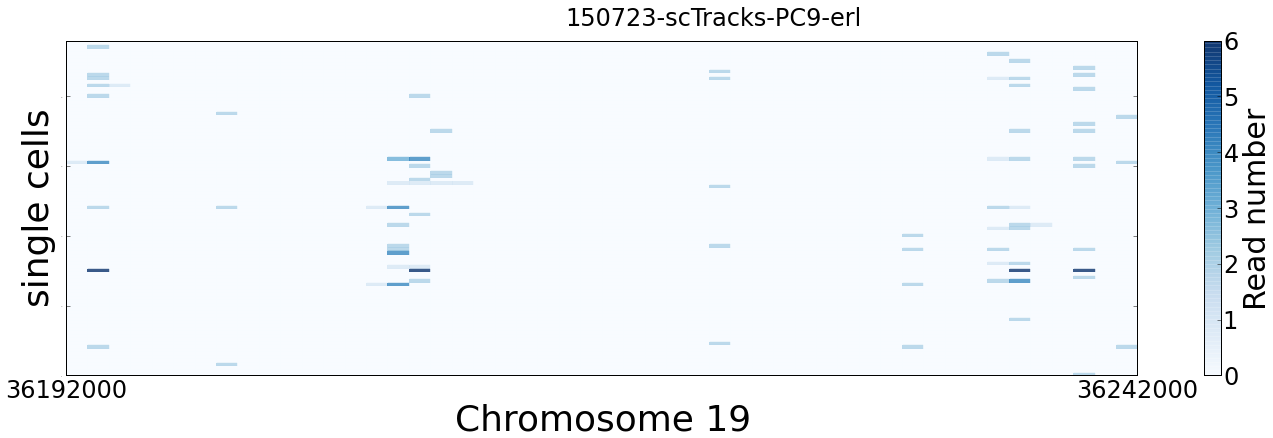

In [284]:
#Plot the data

fig = plt.figure(figsize=(24,6), dpi=1600)
ax = fig.add_subplot(111)
ax.set_ylabel('single cells',fontsize=36)
ax.set_xlabel('Chromosome 19',fontsize=36)
heatMap = plt.pcolor(df.T,cmap=plt.cm.Blues, alpha=0.8)
ax.set_ylim(0,scLib)
cbar = plt.colorbar(heatMap)
cbar.set_ticks(np.arange(-1,max(df.max()))+1)
cbar.ax.tick_params(size=4)

plt.xticks([0,groupNum],[chrLoc['start'],chrLoc['end']],fontsize=24)
plt.yticks(fontsize=0)

cbar.set_label('Read number',fontsize=30)
cbar.ax.tick_params(labelsize=24) #Change size of colorer font
fig.suptitle(fileName,fontsize=24)

#Code to plot the figure (below)
#fig.savefig(fileName + '.png')




In [277]:
#This is the cell in the 150723 dataset that has 6 reads
#df['PLF-sc54'] 